In [23]:
import pandas as pd
import matplotlib.pyplot as plt
Z = 1.96


In [24]:
path = "../../Risultati/Chlorine/rf_classification_mix_outliers_none.csv"
df = pd.read_csv(path)
df.reset_index(drop=True)
df['percentage'] = 100 - df['percentage']
df

,percentage,outlier,correction,imputation,r2
0,100,none,none,none,0.793202
1,100,none,none,none,0.782348
2,100,none,none,none,0.791774
3,100,none,none,none,0.784633
4,100,none,none,none,0.789203
...,...,...,...,...,...
480,50,lof,LOCF,interpolation,0.583548
481,50,hst,drop,LOCF,0.784998
482,50,hst,drop,interpolation,0.787004
483,50,hst,LOCF,LOCF,0.677806


In [25]:
df_neg = df[df['r2']<0]
df_neg

,percentage,outlier,correction,imputation,r2


In [26]:
df.loc[df['r2'] < 0, 'r2'] = 0

In [27]:
df

,percentage,outlier,correction,imputation,r2
0,100,none,none,none,0.793202
1,100,none,none,none,0.782348
2,100,none,none,none,0.791774
3,100,none,none,none,0.784633
4,100,none,none,none,0.789203
...,...,...,...,...,...
480,50,lof,LOCF,interpolation,0.583548
481,50,hst,drop,LOCF,0.784998
482,50,hst,drop,interpolation,0.787004
483,50,hst,LOCF,LOCF,0.677806


In [28]:
df_grouped = df.groupby(['outlier','correction','imputation']).mean().sort_values(by='r2', ascending=False)
print(df_grouped)

                                  percentage        r2
outlier correction imputation                         
none    none       none                100.0  0.788232
lof     drop       interpolation        70.0  0.776564
                   LOCF                 70.0  0.774982
hst     drop       interpolation        70.0  0.686364
                   LOCF                 70.0  0.685766
lof     LOCF       interpolation        70.0  0.663161
                   LOCF                 70.0  0.662975
hst     LOCF       LOCF                 70.0  0.627171
                   interpolation        70.0  0.625378
z       LOCF       interpolation        70.0  0.519123
                   LOCF                 70.0  0.518845
        drop       LOCF                 70.0  0.000000
                   interpolation        70.0  0.000000


In [29]:
df_none = df[(df['outlier'] == 'none') & (df['imputation']=='none')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_none['CI_Min'] = df_none['mean'] - Z * (df_none['std'] / (4 ** 0.5))
df_none['CI_Max'] = df_none['mean'] + Z * (df_none['std'] / (4 ** 0.5))
df_none

,percentage,mean,std,CI_Min,CI_Max
0,100,0.788232,0.00463,0.783694,0.79277


In [30]:
df_z_drop_locf = df[(df['outlier'] == 'z') & (df['correction']=='drop') & (df['imputation']=='LOCF')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_z_drop_locf['CI_Min'] = df_z_drop_locf['mean'] - Z * (df_z_drop_locf['std'] / (4 ** 0.5))
df_z_drop_locf['CI_Max'] = df_z_drop_locf['mean'] + Z * (df_z_drop_locf['std'] / (4 ** 0.5))
df_z_drop_locf

,percentage,mean,std,CI_Min,CI_Max
0,50,0.0,0.0,0.0,0.0
1,60,0.0,0.0,0.0,0.0
2,70,0.0,0.0,0.0,0.0
3,80,0.0,0.0,0.0,0.0
4,90,0.0,0.0,0.0,0.0


In [31]:
df_z_locf_locf = df[(df['outlier'] == 'z') & (df['correction']=='LOCF') & (df['imputation']=='LOCF')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_z_locf_locf['CI_Min'] = df_z_locf_locf['mean'] - Z * (df_z_locf_locf['std'] / (4 ** 0.5))
df_z_locf_locf['CI_Max'] = df_z_locf_locf['mean'] + Z * (df_z_locf_locf['std'] / (4 ** 0.5))
df_z_locf_locf

,percentage,mean,std,CI_Min,CI_Max
0,50,0.516138,0.003061,0.513138,0.519138
1,60,0.519566,0.003140,0.516489,0.522643
2,70,0.519387,0.003508,0.515949,0.522825
3,80,0.521030,0.003809,0.517297,0.524763
4,90,0.518102,0.002358,0.515792,0.520412


In [32]:
df_z_drop_int = df[(df['outlier'] == 'z') & (df['correction']=='drop') & (df['imputation']=='interpolation')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_z_drop_int['CI_Min'] = df_z_drop_int['mean'] - Z * (df_z_drop_int['std'] / (4 ** 0.5))
df_z_drop_int['CI_Max'] = df_z_drop_int['mean'] + Z * (df_z_drop_int['std'] / (4 ** 0.5))
df_z_drop_int

,percentage,mean,std,CI_Min,CI_Max
0,50,0.0,0.0,0.0,0.0
1,60,0.0,0.0,0.0,0.0
2,70,0.0,0.0,0.0,0.0
3,80,0.0,0.0,0.0,0.0
4,90,0.0,0.0,0.0,0.0


In [33]:
df_z_locf_int = df[(df['outlier'] == 'z') & (df['correction']=='LOCF') & (df['imputation']=='interpolation')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_z_locf_int['CI_Min'] = df_z_locf_int['mean'] - Z * (df_z_locf_int['std'] / (4 ** 0.5))
df_z_locf_int['CI_Max'] = df_z_locf_int['mean'] + Z * (df_z_locf_int['std'] / (4 ** 0.5))
df_z_locf_int

,percentage,mean,std,CI_Min,CI_Max
0,50,0.517209,0.003785,0.513500,0.520919
1,60,0.519709,0.001313,0.518422,0.520996
2,70,0.518887,0.002099,0.516831,0.520944
3,80,0.519994,0.002885,0.517167,0.522821
4,90,0.519816,0.003251,0.516630,0.523002


[]

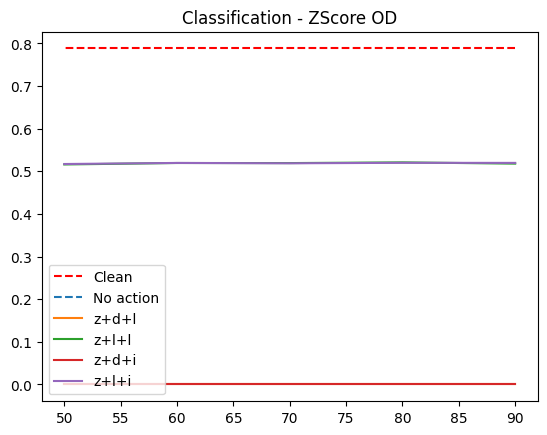

In [34]:
perc = [90,80,70,60,50]
plt.plot(perc, [df_none['mean'].iloc[-1]]*len(perc), 'r--', label='Clean')
plt.plot(df_none['percentage'].iloc[:-1],df_none['mean'].iloc[:-1], '--', label='No action')
#plt.fill_between(df_none['percentage'].iloc[:-1],df_none['CI_Min'].iloc[:-1],df_none['CI_Max'].iloc[:-1],alpha=.05)
#plt.fill_between(df_lof_locf['percentage'],df_lof_locf['CI_Min'],df_lof_locf['CI_Max'],alpha=.05)
plt.plot(df_z_drop_locf['percentage'],df_z_drop_locf['mean'], label='z+d+l')
plt.plot(df_z_locf_locf['percentage'],df_z_locf_locf['mean'], label='z+l+l')
plt.plot(df_z_drop_int['percentage'],df_z_drop_int['mean'], label='z+d+i')
plt.plot(df_z_locf_int['percentage'],df_z_locf_int['mean'], label='z+l+i')
plt.title("Classification - ZScore OD")
plt.legend()
plt.plot()

In [35]:
df_lof_drop_locf = df[(df['outlier'] == 'lof') & (df['correction']=='drop') & (df['imputation']=='LOCF')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_lof_drop_locf['CI_Min'] = df_lof_drop_locf['mean'] - Z * (df_lof_drop_locf['std'] / (4 ** 0.5))
df_lof_drop_locf['CI_Max'] = df_lof_drop_locf['mean'] + Z * (df_lof_drop_locf['std'] / (4 ** 0.5))
df_lof_drop_locf

,percentage,mean,std,CI_Min,CI_Max
0,50,0.768118,0.007494,0.760773,0.775463
1,60,0.770787,0.006164,0.764746,0.776828
2,70,0.775012,0.005435,0.769685,0.780338
3,80,0.779293,0.004477,0.774906,0.783680
4,90,0.781702,0.003840,0.777939,0.785466


In [36]:
df_lof_locf_locf = df[(df['outlier'] == 'lof') & (df['correction']=='LOCF') & (df['imputation']=='LOCF')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_lof_locf_locf['CI_Min'] = df_lof_locf_locf['mean'] - Z * (df_lof_locf_locf['std'] / (4 ** 0.5))
df_lof_locf_locf['CI_Max'] = df_lof_locf_locf['mean'] + Z * (df_lof_locf_locf['std'] / (4 ** 0.5))
df_lof_locf_locf

,percentage,mean,std,CI_Min,CI_Max
0,50,0.599364,0.007412,0.592100,0.606628
1,60,0.632462,0.009100,0.623544,0.641380
2,70,0.661811,0.007360,0.654598,0.669024
3,80,0.693480,0.007521,0.686110,0.700851
4,90,0.727756,0.006478,0.721408,0.734105


In [37]:
df_lof_drop_int = df[(df['outlier'] == 'lof') & (df['correction']=='drop') & (df['imputation']=='interpolation')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_lof_drop_int['CI_Min'] = df_lof_drop_int['mean'] - Z * (df_lof_drop_int['std'] / (4 ** 0.5))
df_lof_drop_int['CI_Max'] = df_lof_drop_int['mean'] + Z * (df_lof_drop_int['std'] / (4 ** 0.5))
df_lof_drop_int

,percentage,mean,std,CI_Min,CI_Max
0,50,0.771271,0.007637,0.763787,0.778755
1,60,0.771031,0.006514,0.764647,0.777415
2,70,0.778443,0.004275,0.774253,0.782632
3,80,0.780806,0.007954,0.773011,0.788601
4,90,0.781271,0.002803,0.778524,0.784018


In [38]:
df_lof_locf_int = df[(df['outlier'] == 'lof') & (df['correction']=='LOCF') & (df['imputation']=='interpolation')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_lof_locf_int['CI_Min'] = df_lof_locf_int['mean'] - Z * (df_lof_locf_int['std'] / (4 ** 0.5))
df_lof_locf_int['CI_Max'] = df_lof_locf_int['mean'] + Z * (df_lof_locf_int['std'] / (4 ** 0.5))
df_lof_locf_int

,percentage,mean,std,CI_Min,CI_Max
0,50,0.594973,0.010892,0.584299,0.605647
1,60,0.635783,0.007391,0.628539,0.643026
2,70,0.665631,0.005417,0.660322,0.670940
3,80,0.693659,0.009115,0.684727,0.702591
4,90,0.725757,0.006555,0.719333,0.732181


[]

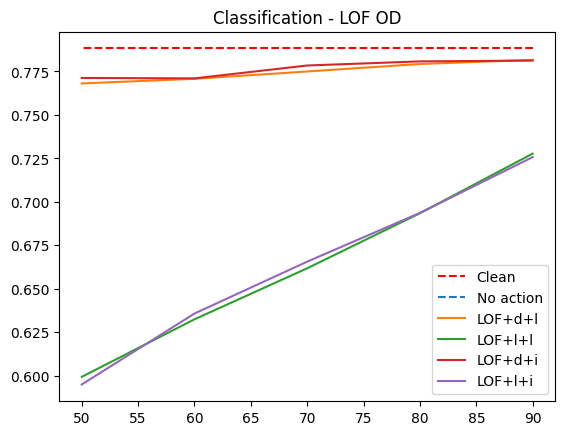

In [39]:
perc = [90,80,70,60,50]
plt.plot(perc, [df_none['mean'].iloc[-1]]*len(perc), 'r--', label='Clean')
plt.plot(df_none['percentage'].iloc[:-1],df_none['mean'].iloc[:-1], '--', label='No action')
#plt.fill_between(df_none['percentage'].iloc[:-1],df_none['CI_Min'].iloc[:-1],df_none['CI_Max'].iloc[:-1],alpha=.05)
#plt.fill_between(df_lof_locf['percentage'],df_lof_locf['CI_Min'],df_lof_locf['CI_Max'],alpha=.05)
plt.plot(df_lof_drop_locf['percentage'],df_lof_drop_locf['mean'], label='LOF+d+l')
plt.plot(df_lof_locf_locf['percentage'],df_lof_locf_locf['mean'], label='LOF+l+l')
plt.plot(df_lof_drop_int['percentage'],df_lof_drop_int['mean'], label='LOF+d+i')
plt.plot(df_lof_locf_int['percentage'],df_lof_locf_int['mean'], label='LOF+l+i')
plt.title("Classification - LOF OD")
plt.legend()
plt.plot()

In [40]:
df_hst_drop_locf = df[(df['outlier'] == 'hst') & (df['correction']=='drop') & (df['imputation']=='LOCF')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_hst_drop_locf['CI_Min'] = df_hst_drop_locf['mean'] - Z * (df_hst_drop_locf['std'] / (4 ** 0.5))
df_hst_drop_locf['CI_Max'] = df_hst_drop_locf['mean'] + Z * (df_hst_drop_locf['std'] / (4 ** 0.5))
df_hst_drop_locf

,percentage,mean,std,CI_Min,CI_Max
0,50,0.783667,0.004056,0.779692,0.787641
1,60,0.784369,0.004867,0.779599,0.789139
2,70,0.784806,0.007302,0.777651,0.791962
3,80,0.785132,0.005089,0.780145,0.790120
4,90,0.290855,0.401741,-0.102851,0.684561


In [41]:
df_hst_locf_locf = df[(df['outlier'] == 'hst') & (df['correction']=='LOCF') & (df['imputation']=='LOCF')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_hst_locf_locf['CI_Min'] = df_hst_locf_locf['mean'] - Z * (df_hst_locf_locf['std'] / (4 ** 0.5))
df_hst_locf_locf['CI_Max'] = df_hst_locf_locf['mean'] + Z * (df_hst_locf_locf['std'] / (4 ** 0.5))
df_hst_locf_locf

,percentage,mean,std,CI_Min,CI_Max
0,50,0.677414,0.017452,0.660311,0.694517
1,60,0.676628,0.015305,0.661629,0.691627
2,70,0.645566,0.013083,0.632745,0.658386
3,80,0.620109,0.012186,0.608166,0.632051
4,90,0.516138,0.019528,0.497001,0.535275


In [42]:
df_hst_drop_int = df[(df['outlier'] == 'hst') & (df['correction']=='drop') & (df['imputation']=='interpolation')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_hst_drop_int['CI_Min'] = df_hst_drop_int['mean'] - Z * (df_hst_drop_int['std'] / (4 ** 0.5))
df_hst_drop_int['CI_Max'] = df_hst_drop_int['mean'] + Z * (df_hst_drop_int['std'] / (4 ** 0.5))
df_hst_drop_int

,percentage,mean,std,CI_Min,CI_Max
0,50,0.784845,0.002990,0.781915,0.787775
1,60,0.786171,0.003556,0.782687,0.789656
2,70,0.785802,0.003130,0.782735,0.788870
3,80,0.784918,0.006910,0.778146,0.791690
4,90,0.290085,0.400638,-0.102540,0.682711


In [43]:
df_hst_locf_int = df[(df['outlier'] == 'hst') & (df['correction']=='LOCF') & (df['imputation']=='interpolation')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_hst_locf_int['CI_Min'] = df_hst_locf_int['mean'] - Z * (df_hst_locf_int['std'] / (4 ** 0.5))
df_hst_locf_int['CI_Max'] = df_hst_locf_int['mean'] + Z * (df_hst_locf_int['std'] / (4 ** 0.5))
df_hst_locf_int

,percentage,mean,std,CI_Min,CI_Max
0,50,0.673415,0.019080,0.654717,0.692113
1,60,0.676235,0.012060,0.664417,0.688054
2,70,0.645601,0.014636,0.631258,0.659945
3,80,0.619252,0.017329,0.602270,0.636234
4,90,0.512389,0.020648,0.492154,0.532625


[]

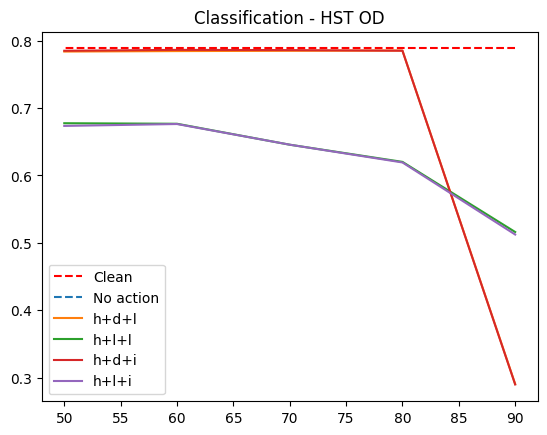

In [44]:
perc = [90,80,70,60,50]
plt.plot(perc, [df_none['mean'].iloc[-1]]*len(perc), 'r--', label='Clean')
plt.plot(df_none['percentage'].iloc[:-1],df_none['mean'].iloc[:-1], '--', label='No action')
#plt.fill_between(df_none['percentage'].iloc[:-1],df_none['CI_Min'].iloc[:-1],df_none['CI_Max'].iloc[:-1],alpha=.05)
#plt.fill_between(df_lof_locf['percentage'],df_lof_locf['CI_Min'],df_lof_locf['CI_Max'],alpha=.05)
plt.plot(df_hst_drop_locf['percentage'],df_hst_drop_locf['mean'], label='h+d+l')
plt.plot(df_hst_locf_locf['percentage'],df_hst_locf_locf['mean'], label='h+l+l')
plt.plot(df_hst_drop_int['percentage'],df_hst_drop_int['mean'], label='h+d+i')
plt.plot(df_hst_locf_int['percentage'],df_hst_locf_int['mean'], label='h+l+i')
plt.title("Classification - HST OD")
plt.legend()
plt.plot()